In [ ]:
! pip install keras_tqdm

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
import keras.backend as K

from keras_tqdm import TQDMNotebookCallback

In [64]:
df = pd.read_csv('gold_data.csv')

In [65]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head()

,GLD
date,
1968-01-04,38.0
1968-02-04,37.6
1968-03-04,37.7
1968-04-04,36.7
1968-05-04,37.2


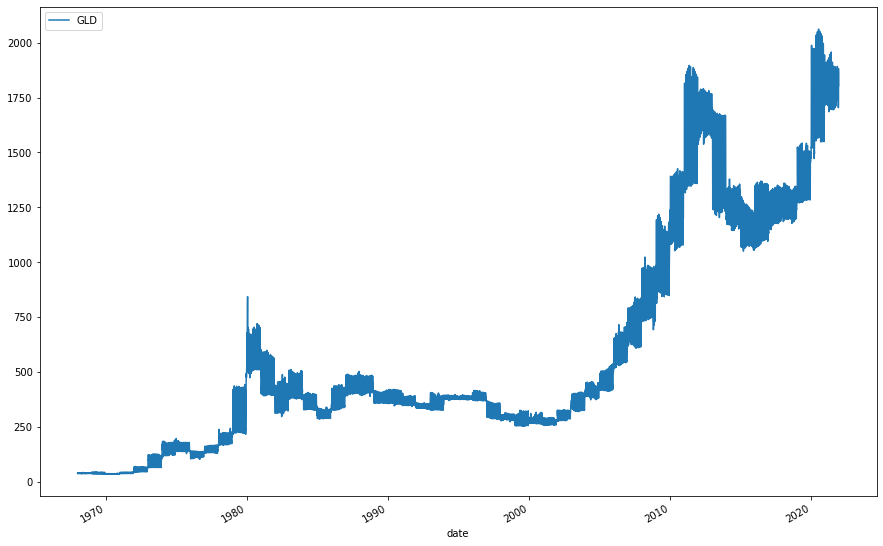

In [66]:

df.plot(figsize=(15,10))

In [67]:
split_date = pd.Timestamp('01-01-2010')

In [68]:
train = df.loc[:split_date, ['GLD']]
test = df.loc[split_date:, ['GLD']]

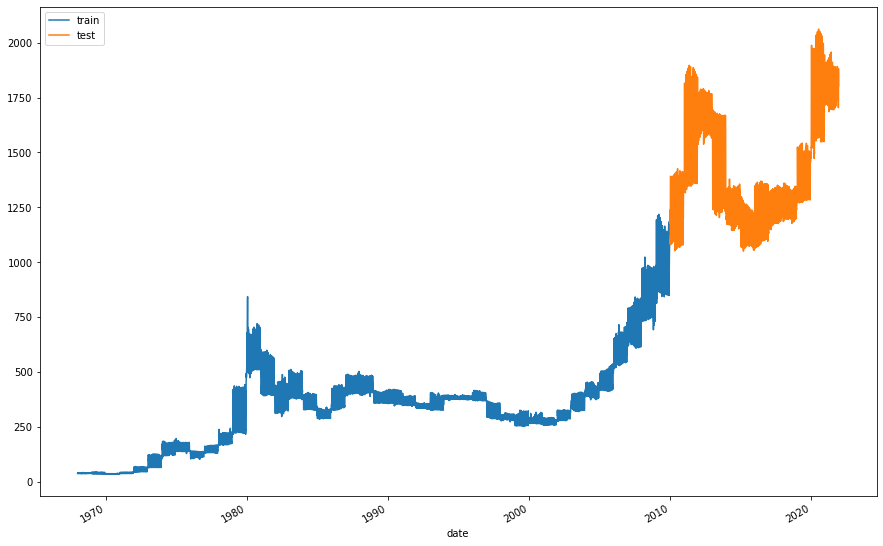

In [69]:
ax = train.plot()
test.plot(ax=ax, figsize=(15,10))
plt.legend(['train', 'test'])

In [70]:
sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [71]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [72]:
train_sc.shape

(15251, 1)

In [ ]:
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [ ]:
X_train_t.shape

(15250, 1, 1)

In [ ]:
K.clear_session()
model = Sequential()

model.add(LSTM(4, input_shape=(1, 1)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
lmst = model.fit(X_train_t, y_train,
          epochs=10, batch_size=2, verbose=1)

Epoch 1/10
7625/7625 [==============================] - 16s 2ms/step - loss: 2.4317e-05
Epoch 2/10
7625/7625 [==============================] - 15s 2ms/step - loss: 2.4305e-05
Epoch 3/10
7625/7625 [==============================] - 15s 2ms/step - loss: 2.4493e-05
Epoch 4/10
7625/7625 [==============================] - 15s 2ms/step - loss: 2.4616e-05
Epoch 5/10
7625/7625 [==============================] - 15s 2ms/step - loss: 2.3956e-05
Epoch 6/10
7625/7625 [==============================] - 15s 2ms/step - loss: 2.4482e-05
Epoch 7/10
7625/7625 [==============================] - 15s 2ms/step - loss: 2.3743e-05
Epoch 8/10
7625/7625 [==============================] - 15s 2ms/step - loss: 2.4434e-05
Epoch 9/10
7625/7625 [==============================] - 15s 2ms/step - loss: 2.4197e-05
Epoch 10/10
7625/7625 [==============================] - 15s 2ms/step - loss: 2.3243e-05


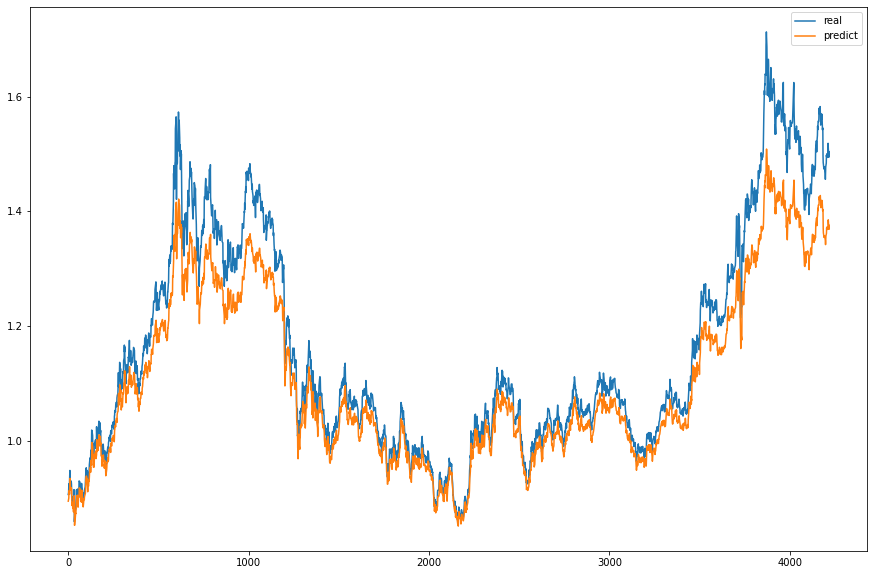

In [ ]:
y_pred = model.predict(X_test_t)
plt.figure(figsize=(15, 10))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['real', 'predict'])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
RSME_score = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RSME_score)

RMSE:  0.06509437000839263


In [ ]:
R2_score = r2_score(y_test, y_pred)
print('R2 score: ', R2_score)

R2 score:  0.8857060156019132


In [ ]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   0.05029721709546276
MSE :   0.004237277006789526
RMAE :   0.06509437000839263


ARIMA Model

In [ ]:
from statsmodels import ARIMA

ImportError: ignored

In [ ]:
! pip install statsmodels